In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/dating.csv')
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [10]:
round(data.describe(), 2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,...,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,...,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,...,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,...,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,...,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,...,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,...,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


In [11]:
data = data.dropna(subset = ['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
                            'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
                            'attractive_important', 'sincere_important', 
                             'intellicence_important', 'funny_important', 
                             'ambtition_important', 'shared_interests_important'])

data = data.fillna(-99)

In [36]:
def age_gap(x):
    if x['age'] == -99:
        return -99
    elif x['age_o'] == -99:
        return -99
    elif x['gender'] == 'female':
        return x['age_o'] - x['age']
    else:
        return x['age'] - x['age_o']

In [37]:
data['age_gap'] = data.apply(age_gap, axis = 1)

In [38]:
data['age_gap_abs'] = abs(data['age_gap'])

In [12]:
def same_race(x):
    if x['race'] == -99:
        return -99
    elif x['race_o'] == -99:
        return -99
    elif x['race'] == x['race_o']:
        return 1
    else:
        return -1

In [13]:
data['same_race'] = data.apply(same_race, axis = 1)

In [14]:
def same_race_point(x):
    if['same_race'] == -99:
        return -99
    else:
        return x['same_race'] * x['importance_same_race']

In [15]:
data['same_race_point'] = data.apply(same_race_point, axis = 1)

In [33]:
def rating(data, importance, score):
    if data[importance] == -99:
        return -99
    elif data[score] == -99:
        return -99
    else:
        return data[importance] * data[score]

In [29]:
partner_imp = data.columns[8:14]
partner_rate_me = data.columns[14:20]
my_imp = data.columns[20:26]
my_rate_partner = data.columns[26:32]

In [30]:
new_label_partner = ['attractive_p', 'sincere_partner_p', 'intelligence_p', 'funny_p', 
                    'ambition_p', 'shared_interests_p']

new_label_me = ['attractive_m', 'sincere_partner_m', 'intelligence_m', 'funny_m', 
                    'ambition_m', 'shared_interests_m']

In [31]:
for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me):
    print(i,' & ',j,' & ',k)

attractive_p  &  pref_o_attractive  &  attractive_o
sincere_partner_p  &  pref_o_sincere  &  sincere_o
intelligence_p  &  pref_o_intelligence  &  intelligence_o
funny_p  &  pref_o_funny  &  funny_o
ambition_p  &  pref_o_ambitious  &  ambitous_o
shared_interests_p  &  pref_o_shared_interests  &  shared_interests_o


In [34]:
for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me):
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1) # ❶

In [35]:
for i,j,k in zip(new_label_me, my_imp, my_rate_partner):
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1)

In [39]:
data = pd.get_dummies(data, columns = ['gender', 'race', 'race_o'], drop_first = True)

In [40]:
from sklearn.model_selection import train_test_split

x = data.drop('match', axis = 1)
y = data['match']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state = 100)

In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [44]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators = 500, max_depth = 5, random_state = 100)

In [45]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [46]:
pred = model.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, pred)

0.8653136531365314

In [48]:
print(confusion_matrix(y_test, pred))

[[1292   73]
 [ 146  115]]


In [49]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.61      0.44      0.51       261

    accuracy                           0.87      1626
   macro avg       0.76      0.69      0.72      1626
weighted avg       0.85      0.87      0.86      1626



In [50]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'learning_rate' : [0.01, 0.1, 0.3],
    'max_depth' : [5, 7, 10],
    'subsample' : [0.5, 0.7, 1],
    'n_estimators' : [300, 500, 1000]
}

In [52]:
model = xgb.XGBClassifier()

In [53]:
gs_model = GridSearchCV(model, parameters, n_jobs = -1, scoring = 'f1', cv = 5)

In [54]:
gs_model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]},
             scoring='f1')

In [55]:
gs_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}

In [56]:
pred = gs_model.predict(x_test)

In [57]:
accuracy_score(y_test, pred)

0.8659286592865929

In [58]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.62      0.43      0.51       261

    accuracy                           0.87      1626
   macro avg       0.76      0.69      0.72      1626
weighted avg       0.85      0.87      0.86      1626



In [59]:
model = xgb.XGBClassifier(learning_rate = 0.3, max_depth = 5, n_estimators = 100)

model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [60]:
model.feature_importances_

array([0.        , 0.00903955, 0.01016881, 0.01175535, 0.01372523,
       0.01414997, 0.01220235, 0.01519316, 0.01027943, 0.01233493,
       0.01439562, 0.07099998, 0.00909732, 0.01331584, 0.03643019,
       0.01149164, 0.02567798, 0.01677557, 0.01010322, 0.01757208,
       0.01040674, 0.01161298, 0.010485  , 0.03722292, 0.01052552,
       0.01063462, 0.03769807, 0.0104868 , 0.01353138, 0.01100384,
       0.01153091, 0.01341428, 0.12373153, 0.02832113, 0.01305657,
       0.00671079, 0.01228152, 0.01140707, 0.01030634, 0.01364389,
       0.01599469, 0.00899245, 0.01160733, 0.01601194, 0.01103382,
       0.01138254, 0.01448602, 0.01319297, 0.01260158, 0.00962826,
       0.01527045, 0.01871971, 0.00773752, 0.01917399, 0.01096412,
       0.01268403, 0.00982285, 0.01640146, 0.00928225, 0.0122918 ],
      dtype=float32)

In [64]:
feature_imp = pd.DataFrame({'features' : x_train.columns, 'values' : model.feature_importances_})

In [65]:
feature_imp.head()

,features,values
0,has_null,0.000000
1,age,0.009040
2,age_o,0.010169
3,importance_same_race,0.011755
4,importance_same_religion,0.013725


<Axes: xlabel='values', ylabel='features'>

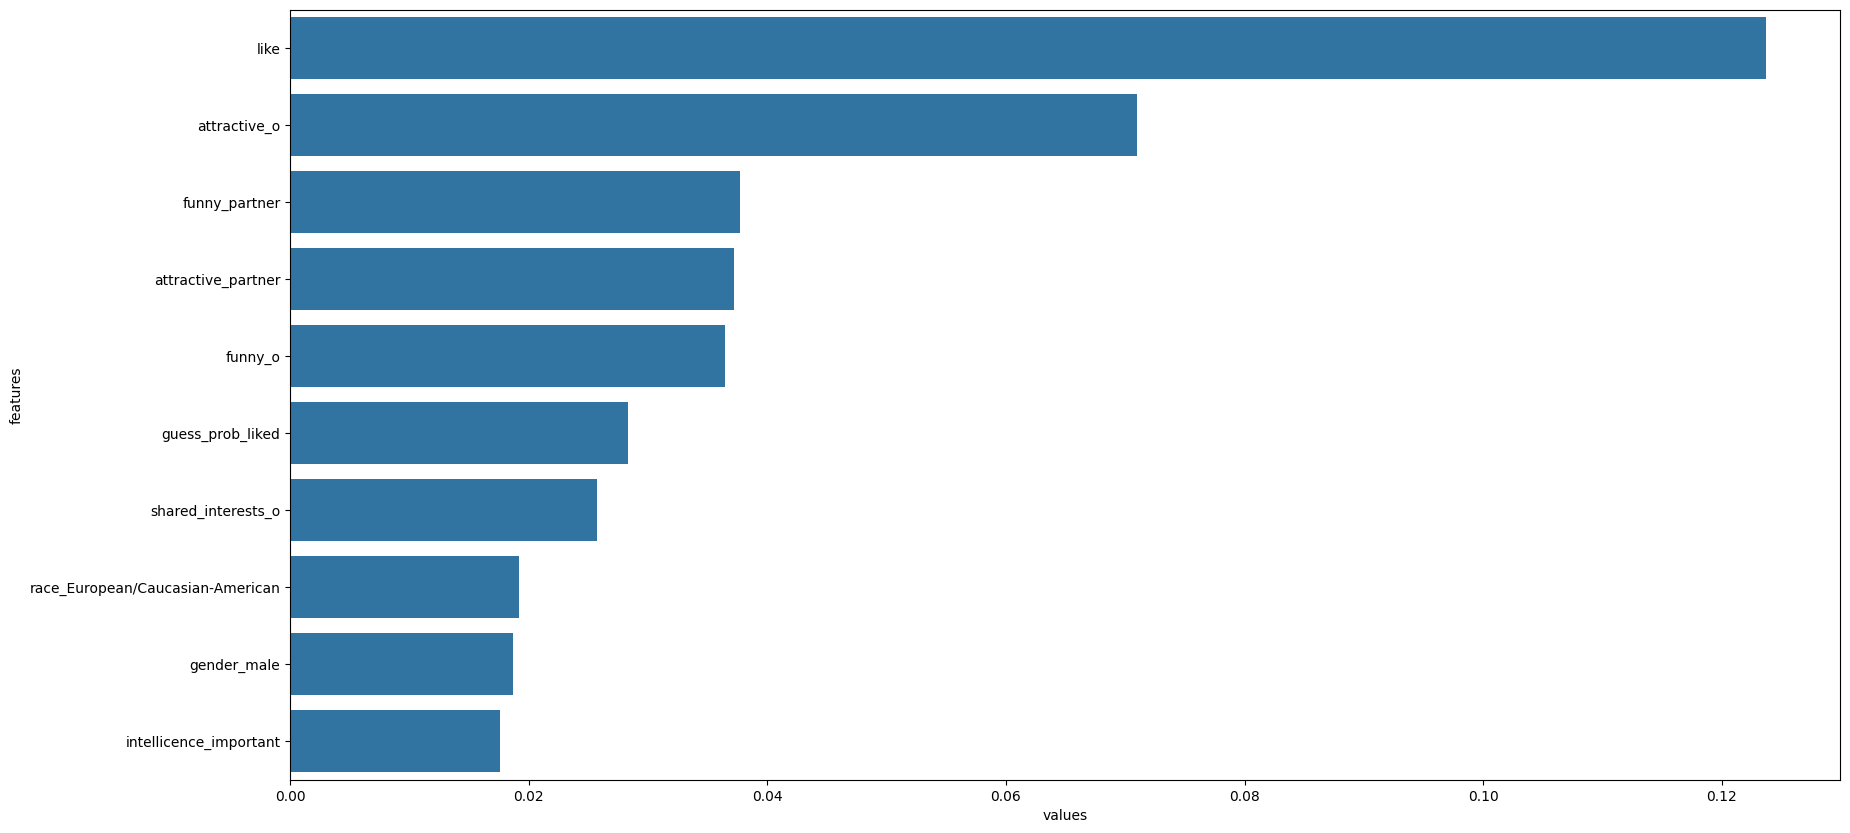

In [66]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'values', y = 'features',
           data = feature_imp.sort_values(by = 'values', ascending = False).head(10))